In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d4d5d6_results_files = [
    '../results/2022-12-07_17-57-13_results.json',
    '../results/2022-12-05_05-30-50_results.json',
    '../results/2022-12-05_13-13-35_results.json',
]

In [3]:
# read in results
results = []
for filename in d4d5d6_results_files:
    with open(filename) as f:
        data = json.load(f)
        results.append(data[0])
        results.append(data[1])
        results.append(data[2])
        
len(results)

9

In [4]:
for result in results:
    print(result['configs'])

{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 50, 'activation_function': 'sigmoid', 'batchsize': 1024}
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 75, 'activation_function': 'sigmoid', 'batchsize': 1024}
{'depth': 4, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 100, 'activation_function': 'sigmoid', 'batchsize': 1024}
{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 50, 'activation_function': 'sigmoid', 'batchsize': 1024}
{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 75, 'activation_function': 'sigmoid', 'batchsize': 

In [5]:
# aggregate r^2 scores
for result in results:
    print(f"depth {result['configs']['depth']}, width {result['configs']['width']}")
    total_r2s = result['results']['total']['r2score_val']
    print('val r2: $', '{0:.4}'.format(np.mean(total_r2s)) + ' \\pm {0:.3}'.format(np.std(total_r2s)) + '$')

depth 4, width 50
val r2: $ 0.9801 \pm 0.000101$
depth 4, width 75
val r2: $ 0.9807 \pm 0.000219$
depth 4, width 100
val r2: $ 0.9799 \pm 0.000167$
depth 5, width 50
val r2: $ 0.9802 \pm 0.000193$
depth 5, width 75
val r2: $ 0.9808 \pm 0.000132$
depth 5, width 100
val r2: $ 0.9792 \pm 0.000219$
depth 6, width 50
val r2: $ 0.9805 \pm 0.000263$
depth 6, width 75
val r2: $ 0.9809 \pm 0.000175$
depth 6, width 100
val r2: $ 0.9787 \pm 0.000265$


In [6]:
results[0]['results']['by_response']['OBJ1'].keys()

dict_keys(['r2score_train', 'adj_r2score_train', 'mae_train', 'mse_train', 'mae_val', 'mape_train', 'r2score_val', 'mse_val', 'adj_r2score_val', 'mape_val'])

In [7]:
# mapes by objective
def get_mapes_by_objective(results, obj_string, val=True):
    output = {}
    for result in results:
        depth = result['configs']['depth']; width = result['configs']['width']
        mapes = result['results']['by_response'][obj_string]['mape_val']
        output[f'{depth}_{width}'] = mapes
    return output

def print_mapes_by_objective(results, obj_string, val=True):
    print(obj_string)
    for result in results:
        conf = f"depth {result['configs']['depth']}, width {result['configs']['width']}"
        mapes = result['results']['by_response'][obj_string]['mape_val']
        print(
            conf,
            f"{'val' if val else 'train'} mape $",
            '{0:.4}'.format(np.mean(mapes)) + ' \\pm {0:.3}'.format(np.std(mapes)) + '$'
        )
        
def print_mape_table_by_objective(results, obj_string, val=True):
    mapes_dict = get_mapes_by_objective(results, obj_string, val=val)
    print(f'% {obj_string}')
    print('''
        \\begin{table*}[htp!]
        \centering
        \\begin{tabular}{|c |c c c|} 
        \hline
        & Depth 4 & Depth 5 & Depth 6 \\\\
        \hline
    '''
    )
    for width in [50, 75, 100]:
        total_string = f'Width {width} & '
        for depth in [4, 5, 6]:
            mapes = mapes_dict[f'{depth}_{width}']
            total_string += '$' + '{0:.4}'.format(np.mean(mapes)) + ' \\pm' + f'{np.std(mapes):.5f}' + ' $ &'
        total_string = total_string[:-1]
        total_string += '\\\\'
        print(total_string)
    suffix = '''\\hline
        \end{tabular}
        \caption{\label{tab:valmape -'''
    suffix += obj_string
    suffix += '''}Validation set $R^2$ scores for \\texttt{OBJ4} (longitudinal emittance).}
        \end{table*}'''
    print(suffix)

In [8]:
for i in range(1, 7):
    print_mape_table_by_objective(results, f'OBJ{i}')

% OBJ1

        \begin{table*}[htp!]
        \centering
        \begin{tabular}{|c |c c c|} 
        \hline
        & Depth 4 & Depth 5 & Depth 6 \\
        \hline
    
Width 50 & $0.01858 \pm0.00057 $ &$0.01838 \pm0.00031 $ &$0.01822 \pm0.00073 $ \\
Width 75 & $0.01618 \pm0.00083 $ &$0.01606 \pm0.00040 $ &$0.01562 \pm0.00062 $ \\
Width 100 & $0.01588 \pm0.00025 $ &$0.01653 \pm0.00054 $ &$0.0171 \pm0.00061 $ \\
\hline
        \end{tabular}
        \caption{\label{tab:valmape -OBJ1}Validation set $R^2$ scores for \texttt{OBJ4} (longitudinal emittance).}
        \end{table*}
% OBJ2

        \begin{table*}[htp!]
        \centering
        \begin{tabular}{|c |c c c|} 
        \hline
        & Depth 4 & Depth 5 & Depth 6 \\
        \hline
    
Width 50 & $0.01806 \pm0.00007 $ &$0.01814 \pm0.00008 $ &$0.01806 \pm0.00008 $ \\
Width 75 & $0.0181 \pm0.00007 $ &$0.01806 \pm0.00005 $ &$0.0181 \pm0.00003 $ \\
Width 100 & $0.01816 \pm0.00005 $ &$0.01823 \pm0.00006 $ &$0.01829 \pm0.00010 $ \\
\hline

In [9]:
for i in range(1, 7):
    print_mapes_by_objective(results, f'OBJ{i}')
    print(' ')

OBJ1
depth 4, width 50 val mape $ 0.01858 \pm 0.000574$
depth 4, width 75 val mape $ 0.01618 \pm 0.000827$
depth 4, width 100 val mape $ 0.01588 \pm 0.00025$
depth 5, width 50 val mape $ 0.01838 \pm 0.00031$
depth 5, width 75 val mape $ 0.01606 \pm 0.000401$
depth 5, width 100 val mape $ 0.01653 \pm 0.000536$
depth 6, width 50 val mape $ 0.01822 \pm 0.000734$
depth 6, width 75 val mape $ 0.01562 \pm 0.000618$
depth 6, width 100 val mape $ 0.0171 \pm 0.000608$
 
OBJ2
depth 4, width 50 val mape $ 0.01806 \pm 6.97e-05$
depth 4, width 75 val mape $ 0.0181 \pm 6.95e-05$
depth 4, width 100 val mape $ 0.01816 \pm 4.88e-05$
depth 5, width 50 val mape $ 0.01814 \pm 8.2e-05$
depth 5, width 75 val mape $ 0.01806 \pm 5.07e-05$
depth 5, width 100 val mape $ 0.01823 \pm 6.3e-05$
depth 6, width 50 val mape $ 0.01806 \pm 7.55e-05$
depth 6, width 75 val mape $ 0.0181 \pm 3.1e-05$
depth 6, width 100 val mape $ 0.01829 \pm 9.58e-05$
 
OBJ3
depth 4, width 50 val mape $ 0.01455 \pm 0.000458$
depth 4, width

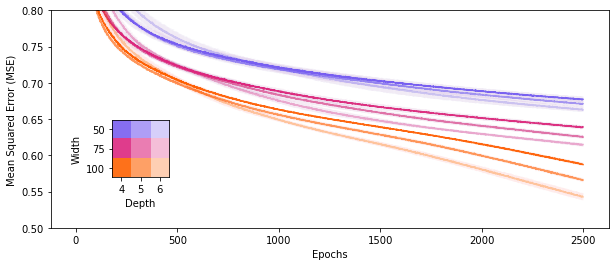

In [117]:
# plotting training histories
def get_training_losses(results):
    output = {}
    for result in results:
        depth = result['configs']['depth']; width = result['configs']['width']
        losses = result['results']['total']['training_losses']
        output[f'{depth}_{width}'] = losses
    return output

def get_color(depth, width, depths=[4, 5, 6], widths=[50, 75, 100], alpha_adjust=.3, err=False):
    lavender = (120, 94, 240)
    magenta = (220, 38, 127)
    orange = (254, 97, 0)
    gold = (255, 176, 0)
    
    colors = [lavender, magenta, orange, gold]
    
    if depth not in depths or width not in widths:
        raise(NotImplementedError)
    else:
        didx = depths.index(depth); widx = widths.index(width)
        color = tuple(comp/255 for comp in colors[widx])
        alpha = (0.9 - alpha_adjust*didx)*(0.1 if err else 1.)
    return (*color, alpha)



depths = [4, 5, 6]; widths = [50, 75, 100];

fig, ax = plt.subplots(1, 1, figsize=(10,4))

all_training_losses = get_training_losses(results)
epochs = np.arange(1, 2501)

for depth in depths:
    for width in widths:
        training_losses = all_training_losses[f'{depth}_{width}']
        ax.plot(np.mean(training_losses, axis=0), color=get_color(depth, width))
        ax.errorbar(
            epochs, np.mean(training_losses, axis=0),
            yerr=np.std(training_losses, axis=0), color=get_color(depth, width, err=True), alpha=0.01)

ax.set_ylim([0.5, 0.8])
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Squared Error (MSE)')
        
l, b, h, w = .15, .3, .2, .2
ax2 = fig.add_axes([l, b, w, h])
ax2.imshow(
    np.array([[get_color(depth, width) for depth in depths] for width in widths])
)
ax2.set_xlabel('Depth')
ax2.set_ylabel('Width')
ax2.set_xticks([0., 1., 2.])
ax2.set_yticks([0., 1., 2.])
ax2.set_xticklabels(depths)
ax2.set_yticklabels(widths)

plt.savefig("../img/dec7_hyperparamscan_traininglosses.png", dpi=500)
plt.show()

In [74]:
np.array([[get_color(depth, width) for depth in depths] for width in widths])

array([[[120. ,  94. , 240. ,   0.8],
        [220. ,  38. , 127. ,   0.8],
        [254. ,  97. ,   0. ,   0.8]],

       [[120. ,  94. , 240. ,   0.7],
        [220. ,  38. , 127. ,   0.7],
        [254. ,  97. ,   0. ,   0.7]],

       [[120. ,  94. , 240. ,   0.6],
        [220. ,  38. , 127. ,   0.6],
        [254. ,  97. ,   0. ,   0.6]]])

In [25]:
get_color(4, 50)

(0.553375, 0.21945, 0.353875)